In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv(r'C:\Users\bende\JupyterRoot\Datasets\ufo_complete.csv', on_bad_lines="skip")
pd.set_option('display.max.columns', 22)
df.head()

C:\Users\bende\AppData\Local\Temp\ipykernel_6996\1612277699.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\bende\JupyterRoot\Datasets\ufo_complete.csv', on_bad_lines="skip")


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


# Data Cleaning

### Cleaning "duration (seconds)" field

In [3]:
problematic_rows = df[pd.to_numeric(df.iloc[:, 5], errors='coerce').isna() & df.iloc[:, 5].notna()]
problematic_rows

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
30821,2/2/2000 19:33,bouse,az,us,NaN,2`,each a few seconds,Driving through Plomosa Pass towards Bouse Loo...,2/16/2000,33.9325000,-114.005000
39519,4/10/2005 22:52,santa cruz,ca,us,NaN,8`,eight seconds,2 red lights moving together and apart with a ...,4/16/2005,36.9741667,-122.029722
64975,7/21/2006 13:00,ibague (colombia),NaN,NaN,circle,0.5`,1/2 segundo,Viajaba a 27.000 pies en un avion comercial ve...,10/30/2006,4.440663,-75.244141


In [4]:
df['duration (seconds)'] = df['duration (seconds)'].str.replace('`','')

In [5]:
df['duration (seconds)'] = pd.to_numeric(df['duration (seconds)'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88679 entries, 0 to 88678
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              88679 non-null  object 
 1   city                  88679 non-null  object 
 2   state                 81270 non-null  object 
 3   country               76314 non-null  object 
 4   shape                 85757 non-null  object 
 5   duration (seconds)    65535 non-null  float64
 6   duration (hours/min)  85660 non-null  object 
 7   comments              88644 non-null  object 
 8   date posted           88679 non-null  object 
 9   latitude              88679 non-null  object 
 10  longitude             88679 non-null  float64
dtypes: float64(2), object(9)
memory usage: 7.4+ MB


### Cleaning "duration (seconds)" field

In [7]:
df['datetime'] = df['datetime'].str.replace('24:','00:')
df['datetime'] = pd.to_datetime(df['datetime'], format='mixed')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88679 entries, 0 to 88678
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              88679 non-null  datetime64[ns]
 1   city                  88679 non-null  object        
 2   state                 81270 non-null  object        
 3   country               76314 non-null  object        
 4   shape                 85757 non-null  object        
 5   duration (seconds)    65535 non-null  float64       
 6   duration (hours/min)  85660 non-null  object        
 7   comments              88644 non-null  object        
 8   date posted           88679 non-null  object        
 9   latitude              88679 non-null  object        
 10  longitude             88679 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 7.4+ MB


### City cleaning

In [9]:
df['city'] = df['city'].str.title()
df['city']

0                  San Marcos
1                Lackland Afb
2        Chester (Uk/England)
3                        Edna
4                     Kaneohe
                 ...         
88674                    Napa
88675                  Vienna
88676                  Edmond
88677                   Starr
88678          Ft. Lauderdale
Name: city, Length: 88679, dtype: object

In [10]:
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')

### Country cleaning

In [11]:
df['country'].unique()

array(['us', nan, 'gb', 'ca', 'au', 'de'], dtype=object)

In [12]:
df[df['country'].isna()]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
1,1949-10-10 21:00:00,Lackland Afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082
18,1973-10-10 23:00:00,Bermuda Nas,NaN,NaN,light,20.0,20 sec.,saw fast moving blip on the radar scope thin w...,1/11/2002,32.364167,-64.678611
19,1974-10-10 17:00:00,Willow Beach,az,NaN,light,120.0,2 min,The object was a brillant white light standing...,2/18/2001,0.000000,0.000000
30,1979-10-10 22:00:00,Saddle Lake (Canada),ab,NaN,triangle,270.0,4.5 or more min.,Lights far above&#44 that glance; then flee f...,1/19/2005,53.970571,-111.689885
36,1982-10-10 07:00:00,Gisborne (New Zealand),NaN,NaN,disk,120.0,2min,gisborne nz 1982 wainui beach to sponge bay,1/11/2002,-38.662334,178.017649
...,...,...,...,...,...,...,...,...,...,...,...
88623,2011-09-09 22:45:00,Denmark,NaN,NaN,light,NaN,5 minutes,slow moving light about 5 meters up in the skye.,10/10/2011,0.000000,0.000000
88659,2013-09-09 12:00:00,Star Tannery,va,NaN,unknown,NaN,unk,Object seen in photo after it was taken and ph...,10/3/2013,39.078889,-78.427222
88663,2013-09-09 20:15:00,Clifton,nj,NaN,other,NaN,~1hr+,Luminous line seen in New Jersey sky.,9/30/2013,40.858433,-74.163755
88666,2013-09-09 21:00:00,Aleksandrow (Poland),NaN,NaN,light,NaN,15 seconds,Two points of light following one another in a...,9/30/2013,50.465843,22.891814


In [13]:
df['country_extracted'] = df['city'].str.extract(r'\((.*?)\)')
df['city'] = df['city'].str.replace(r'\s*\(.*?\)', '', regex=True)
df


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,country_extracted
0,1949-10-10 20:30:00,San Marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,NaN
1,1949-10-10 21:00:00,Lackland Afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082,NaN
2,1955-10-10 17:00:00,Chester,NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667,Uk/England
3,1956-10-10 21:00:00,Edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833,NaN
4,1960-10-10 20:00:00,Kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
88674,2013-09-09 22:00:00,Napa,ca,us,other,NaN,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444,NaN
88675,2013-09-09 22:20:00,Vienna,va,us,circle,NaN,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556,NaN
88676,2013-09-09 23:00:00,Edmond,ok,us,cigar,NaN,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,9/30/2013,35.652778,-97.477778,NaN
88677,2013-09-09 23:00:00,Starr,sc,us,diamond,NaN,2 nights,On September ninth my wife and i noticed stran...,9/30/2013,34.376944,-82.695833,NaN


In [14]:
df['country'].replace({'us':'United States of America', 'gb':'United Kingdom', 'ca':'Canada', 'au':'Australia', 'de':'Germany', np.NaN:'not specified'}, inplace=True)
df['country'].unique()

array(['United States of America', 'not specified', 'United Kingdom',
       'Canada', 'Australia', 'Germany'], dtype=object)

In [15]:
df.loc[df['country'] == 'not specified', 'country'] = df['country_extracted'].combine_first(df['country'])
df

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,country_extracted
0,1949-10-10 20:30:00,San Marcos,tx,United States of America,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,NaN
1,1949-10-10 21:00:00,Lackland Afb,tx,not specified,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082,NaN
2,1955-10-10 17:00:00,Chester,NaN,United Kingdom,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667,Uk/England
3,1956-10-10 21:00:00,Edna,tx,United States of America,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833,NaN
4,1960-10-10 20:00:00,Kaneohe,hi,United States of America,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
88674,2013-09-09 22:00:00,Napa,ca,United States of America,other,NaN,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444,NaN
88675,2013-09-09 22:20:00,Vienna,va,United States of America,circle,NaN,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556,NaN
88676,2013-09-09 23:00:00,Edmond,ok,United States of America,cigar,NaN,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,9/30/2013,35.652778,-97.477778,NaN
88677,2013-09-09 23:00:00,Starr,sc,United States of America,diamond,NaN,2 nights,On September ninth my wife and i noticed stran...,9/30/2013,34.376944,-82.695833,NaN


In [16]:
df['country'].unique()

array(['United States of America', 'not specified', 'United Kingdom', ...,
       'Entire West Coast', 'Long Island/Atlantic Ocean', 'Hollyridge'],
      dtype=object)

In [17]:
## Countries occured
country_counts = df['country'].value_counts().reset_index()
country_counts[country_counts['count']>6]

,country,count
0,United States of America,70293
1,not specified,6585
2,Canada,3882
3,United Kingdom,2050
4,Australia,666
...,...,...
94,Kosovo,7
95,Nsw&#44 Australia,7
96,Panama,7
97,Cuba,7


In [18]:
country_counts = df['country'].value_counts()

# Заменяем редкие страны на "not specified"
df['country'] = df['country'].map(lambda x: x if country_counts[x] > 6 else "not specified")

In [19]:
df['country'].unique()

array(['United States of America', 'not specified', 'United Kingdom',
       'Canada', 'New Zealand', 'Russia', 'Puerto Rico',
       'Nsw&#44 Australia', 'Italy', 'Uk/England', 'Australia',
       'Lithuania', 'Norway', 'Denmark', 'Iceland', 'Sweden', 'Mexico',
       'Austria', 'Japan', 'Peru', 'Turkey', 'Belgium', 'Rural', 'China',
       'Greece', 'North Of', 'Between', 'Malaysia', 'Over', 'France',
       'Republic Of Ireland', 'Indonesia', 'India', 'In Flight',
       'Thailand', 'Portugal', 'Hungary', 'Germany', 'Spain',
       'Philippines', 'Venezuela', 'Pakistan', 'Iran', 'Afghanistan',
       'Morocco', 'Viet Nam', 'Taiwan', 'Uk/Scotland', 'Near', 'Israel',
       'Colombia', 'Egypt', 'Poland', 'Yugoslavia', 'Iraq',
       'South Africa', 'Cyprus', 'Ireland', 'Costa Rica', 'Honduras',
       'Netherlands', 'Dominican Republic', 'Finland', 'Argentina',
       'Jamaica', 'Switzerland', 'Bangladesh', 'Czech Republic',
       'Northern Ireland', 'U. S. Virgin Islands', 'Sri Lank

### Other fields cleaning

In [20]:
# uppercase for states
df['state']= df['state'].str.upper()
df['state']

0         TX
1         TX
2        NaN
3         TX
4         HI
        ... 
88674     CA
88675     VA
88676     OK
88677     SC
88678     FL
Name: state, Length: 88679, dtype: object

In [21]:
# latitude to float
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')

In [22]:
#to date time format
df['date posted']=pd.to_datetime(df['date posted'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88679 entries, 0 to 88678
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              88679 non-null  datetime64[ns]
 1   city                  88679 non-null  object        
 2   state                 81270 non-null  object        
 3   country               88679 non-null  object        
 4   shape                 85757 non-null  object        
 5   duration (seconds)    65535 non-null  float64       
 6   duration (hours/min)  85660 non-null  object        
 7   comments              88644 non-null  object        
 8   date posted           88679 non-null  datetime64[ns]
 9   latitude              88678 non-null  float64       
 10  longitude             88679 non-null  float64       
 11  country_extracted     14540 non-null  object        
dtypes: datetime64[ns](2), float64(3), object(7)
memory usage: 8.1+ MB


## Missing data

In [24]:
# AMOUNT OF DATA WHAT IS MISSING
df.isnull().sum()

datetime                    0
city                        0
state                    7409
country                     0
shape                    2922
duration (seconds)      23144
duration (hours/min)     3019
comments                   35
date posted                 0
latitude                    1
longitude                   0
country_extracted       74139
dtype: int64

In [25]:
# AMOUNT OF UNIQUE VALUES
df.nunique()

datetime                75905
city                    18433
state                      68
country                    99
shape                      29
duration (seconds)        457
duration (hours/min)     9791
comments                88283
date posted               317
latitude                19441
longitude               20549
country_extracted        2953
dtype: int64

In [26]:
# duplicated rows search
df[df.duplicated()].count()

datetime                0
city                    0
state                   0
country                 0
shape                   0
duration (seconds)      0
duration (hours/min)    0
comments                0
date posted             0
latitude                0
longitude               0
country_extracted       0
dtype: int64

In [27]:
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,country_extracted
0,1949-10-10 20:30:00,San Marcos,TX,United States of America,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111,NaN
1,1949-10-10 21:00:00,Lackland Afb,TX,not specified,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082,NaN
2,1955-10-10 17:00:00,Chester,NaN,United Kingdom,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667,Uk/England
3,1956-10-10 21:00:00,Edna,TX,United States of America,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833,NaN
4,1960-10-10 20:00:00,Kaneohe,HI,United States of America,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611,NaN


# Analysis

## The first and the last record in a list and time range

In [28]:
# the first
print(df['datetime'].min())

1906-11-11 00:00:00


In [29]:
# the last
print(df['datetime'].max())

2014-05-08 18:45:00


In [30]:
# time range
delta = df['datetime'].max() - df['datetime'].min() 
print(f'{delta.days / 365.25:.2f} years')

107.49 years


## Countries of Sightings

In [31]:
country_counts = df['country'].value_counts().reset_index()
country_counts

,country,count
0,United States of America,70293
1,not specified,8169
2,Canada,3882
3,United Kingdom,2050
4,Australia,666
...,...,...
94,Baja California,7
95,Panama,7
96,Taiwan,7
97,Nsw&#44 Australia,7


In [32]:
country_counts_top5 = country_counts.iloc[:5]
country_counts_top5

,country,count
0,United States of America,70293
1,not specified,8169
2,Canada,3882
3,United Kingdom,2050
4,Australia,666


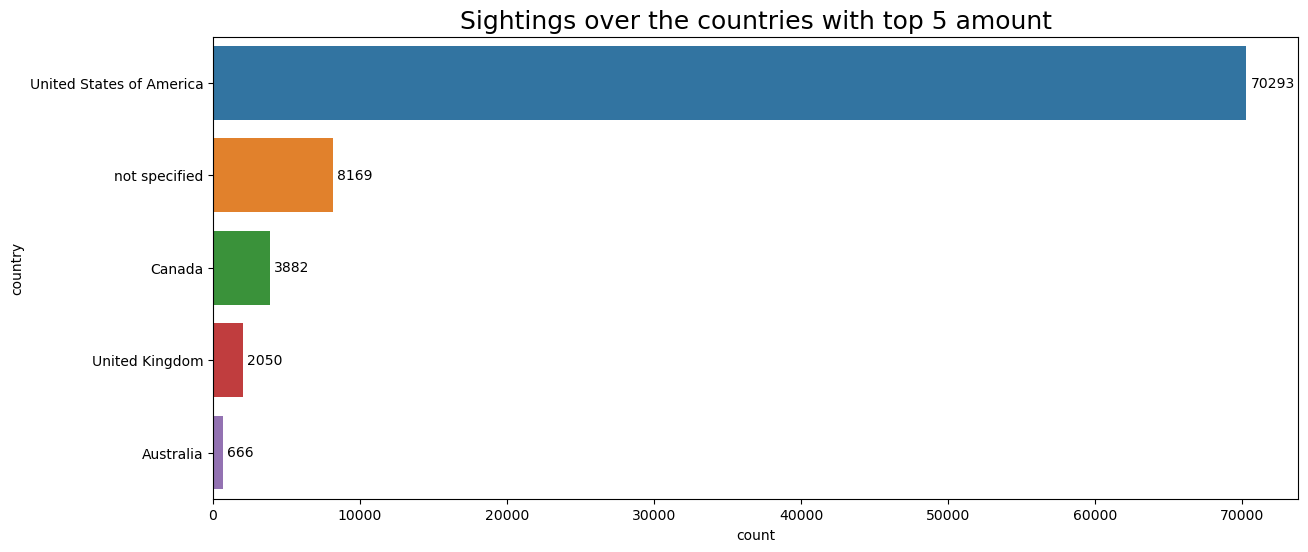

In [33]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(data = country_counts_top5, y='country', x='count', hue='country')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10, padding=3)
plt.title('Sightings over the countries with top 5 amount', fontsize=18)
plt.show()

In [34]:
country_counts_other = country_counts.iloc[5:]
country_counts_other

,country,count
5,Uk/England,336
6,Mexico,235
7,India,225
8,Between,174
9,Germany,135
...,...,...
94,Baja California,7
95,Panama,7
96,Taiwan,7
97,Nsw&#44 Australia,7


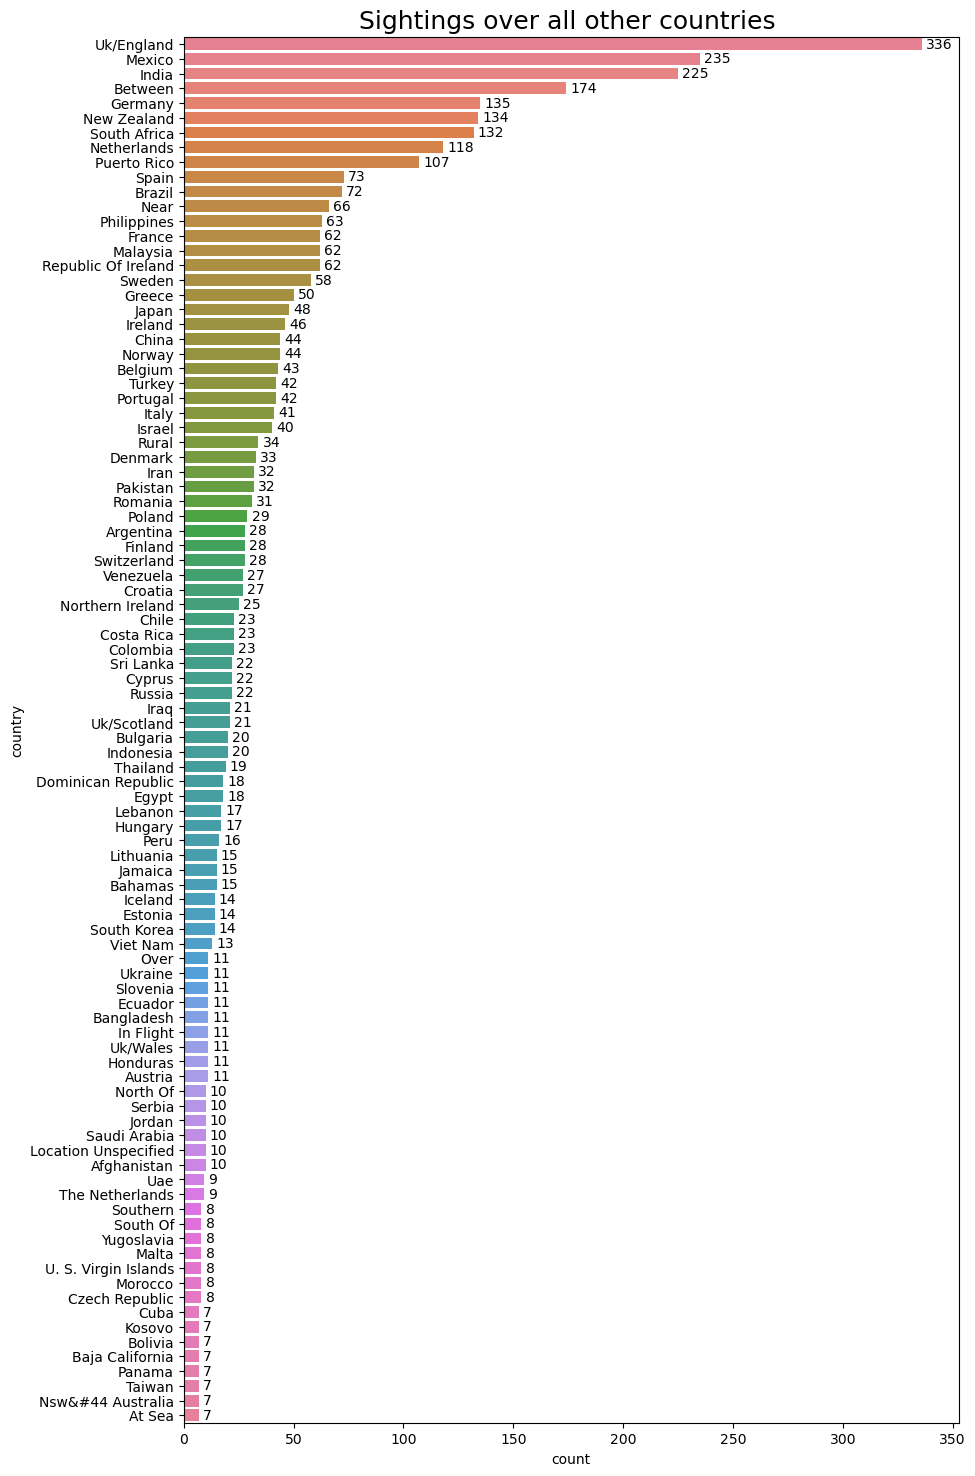

In [35]:
plt.figure(figsize=(10, 18))
ax = sns.barplot(data = country_counts_other, y='country', x='count', hue='country')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10, padding=3)
plt.title('Sightings over all other countries ', fontsize=18)
plt.show()

In [36]:
import geopandas as gpd

In [37]:
# Загружаем карту мира
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")
# Объединяем данные с геоданными
world = world.merge(country_counts, how="left", left_on="NAME", right_on="country")

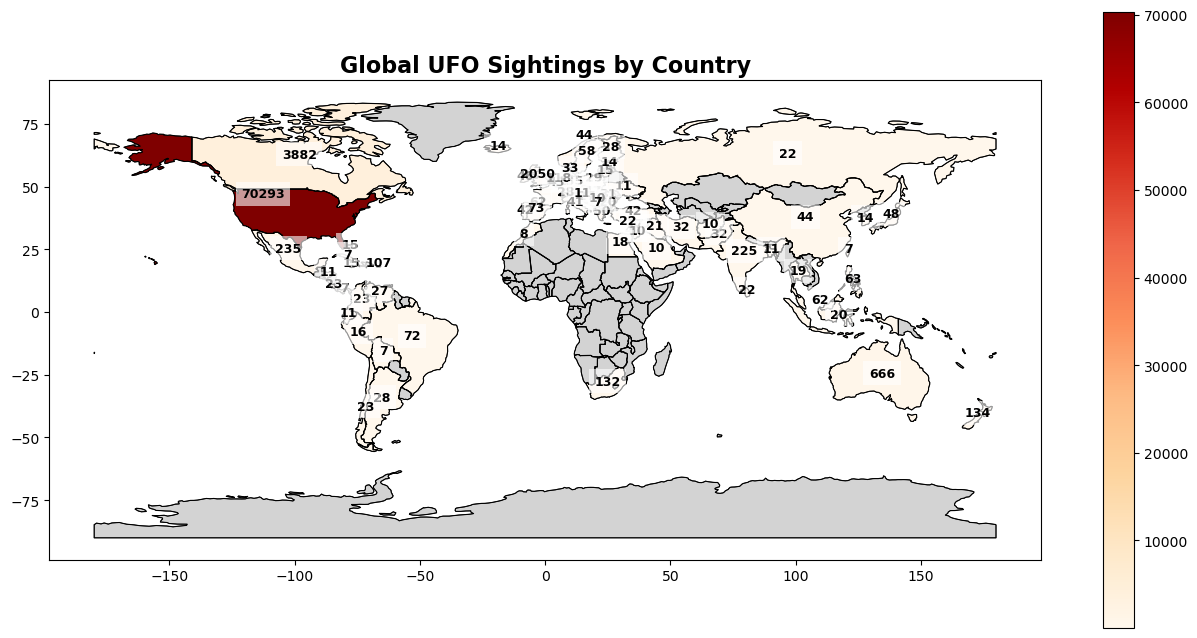

In [56]:
fig, ax = plt.subplots(figsize=(16, 8))

# Plot country boundaries
world.boundary.plot(ax=ax, linewidth=0.8, color="black")

# Plot the UFO sightings count per country with improved styling
world.plot(
    column="count",
    cmap="OrRd",
    legend=True,
    ax=ax,
    edgecolor="black",
    linewidth=0.5,
    missing_kwds={"color": "lightgrey", "label": "No data"},
    vmin=10,  # Set minimum value for color contrast
    vmax=world["count"].max(),  # Ensure good contrast
)

# Add country labels with count values
for idx, row in world.iterrows():
    if row["count"] > 0:  # Show labels only for non-zero counts
        ax.text(
            row.geometry.centroid.x,
            row.geometry.centroid.y,
            str(int(row["count"])),
            fontsize=9,
            ha='center',
            color="black",
            weight="bold",
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.6)  # Background for readability
        )

# Set title and improve appearance
plt.title("Global UFO Sightings by Country", fontsize=16, fontweight="bold")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Remove grid for a cleaner look
ax.grid(False)

plt.show()

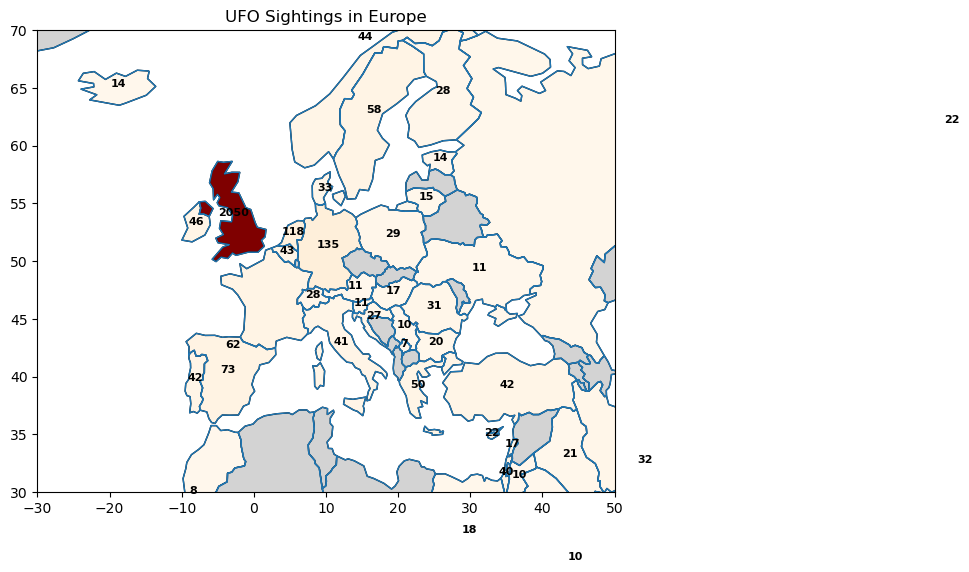

In [39]:
# Define Europe boundaries (longitude & latitude)
europe_bbox = {"minx": -30, "maxx": 50, "miny": 30, "maxy": 70}

# Filter only European countries by coordinates
europe = world.cx[europe_bbox["minx"]:europe_bbox["maxx"], europe_bbox["miny"]:europe_bbox["maxy"]]

# Plot map
fig, ax = plt.subplots(figsize=(10, 6))
europe.boundary.plot(ax=ax, linewidth=1)
europe.plot(column="count", cmap="OrRd", legend=False, ax=ax, edgecolor="black", missing_kwds={"color": "lightgrey"})

# Add country labels with counts
for idx, row in europe.iterrows():
    if row["count"] > 0:  # Show only non-zero values
        ax.text(row.geometry.centroid.x, row.geometry.centroid.y, str(int(row["count"])), 
                fontsize=8, ha='center', color="black", weight="bold")

# Set map limits
ax.set_xlim(europe_bbox["minx"], europe_bbox["maxx"])
ax.set_ylim(europe_bbox["miny"], europe_bbox["maxy"])
plt.title("UFO Sightings in Europe")

plt.show()

# Shapes of UFOs

In [40]:
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,country_extracted
0,1949-10-10 20:30:00,San Marcos,TX,United States of America,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111,NaN
1,1949-10-10 21:00:00,Lackland Afb,TX,not specified,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082,NaN
2,1955-10-10 17:00:00,Chester,NaN,United Kingdom,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667,Uk/England
3,1956-10-10 21:00:00,Edna,TX,United States of America,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833,NaN
4,1960-10-10 20:00:00,Kaneohe,HI,United States of America,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611,NaN


In [41]:
shapes = df['shape'].value_counts().reset_index()

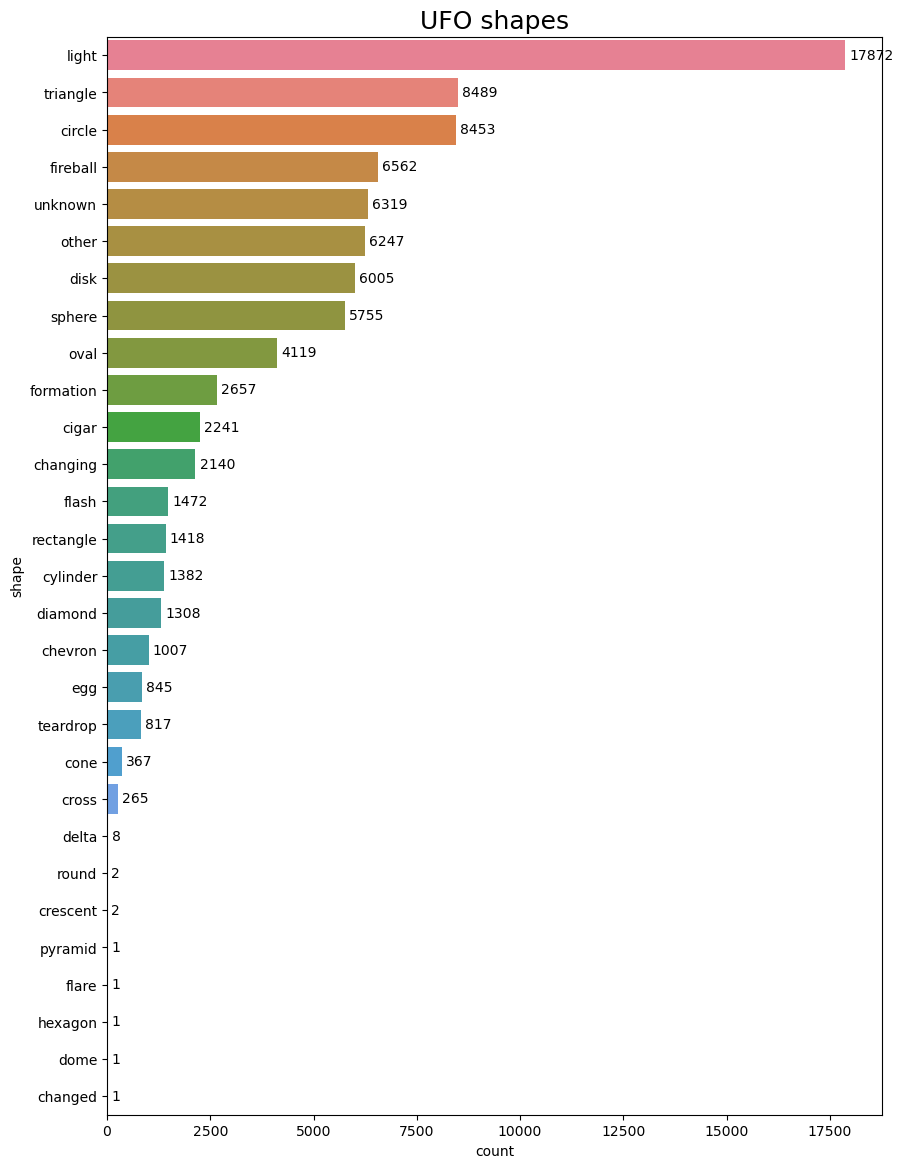

In [42]:
plt.figure(figsize=(10, 14))
ax = sns.barplot(data = shapes, y='shape', x='count', hue='shape')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10, padding=3)
plt.title('UFO shapes', fontsize=18)
plt.show()

# Sightings over time

In [43]:
df.set_index('datetime', inplace=True)
df.head()

,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,country_extracted
datetime,,,,,,,,,,,
1949-10-10 20:30:00,San Marcos,TX,United States of America,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111,NaN
1949-10-10 21:00:00,Lackland Afb,TX,not specified,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082,NaN
1955-10-10 17:00:00,Chester,NaN,United Kingdom,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667,Uk/England
1956-10-10 21:00:00,Edna,TX,United States of America,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833,NaN
1960-10-10 20:00:00,Kaneohe,HI,United States of America,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611,NaN


## Resampling

In [44]:
# It aggregates all to a month level and the count values of those months
df.resample('ME').count()

,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,country_extracted
datetime,,,,,,,,,,,
1906-11-30,1,0,1,1,1,1,1,1,1,1,1
1906-12-31,0,0,0,0,0,0,0,0,0,0,0
1907-01-31,0,0,0,0,0,0,0,0,0,0,0
1907-02-28,0,0,0,0,0,0,0,0,0,0,0
1907-03-31,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2014-01-31,697,665,697,679,697,680,697,697,697,697,62
2014-02-28,527,505,527,517,527,508,527,527,527,527,42
2014-03-31,496,456,496,487,496,480,496,496,496,496,58


In [45]:
monthly_counts = df.resample('ME').count()

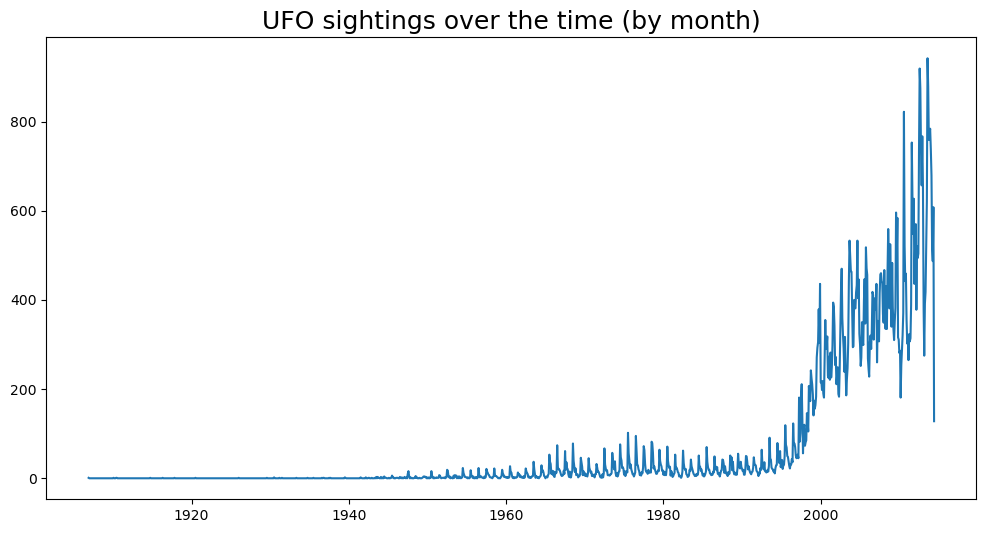

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index, monthly_counts['shape'])
plt.title('UFO sightings over the time (by month)', fontsize=18)
plt.show()

In [47]:
df['duration (seconds)'].sort_values(ascending=False)

datetime
1983-10-01 17:00:00    97836000.0
2010-06-03 23:30:00    82800000.0
1983-04-02 00:00:00    52623200.0
1969-06-30 22:45:00    25248000.0
1994-03-01 01:00:00    10526400.0
                          ...    
2013-09-09 22:00:00           NaN
2013-09-09 22:20:00           NaN
2013-09-09 23:00:00           NaN
2013-09-09 23:00:00           NaN
2013-09-09 23:30:00           NaN
Name: duration (seconds), Length: 88679, dtype: float64

In [48]:
filtered_by_duration = df[df['duration (seconds)']< 1052640]
filtered_by_duration

,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,country_extracted
datetime,,,,,,,,,,,
1949-10-10 20:30:00,San Marcos,TX,United States of America,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111,NaN
1949-10-10 21:00:00,Lackland Afb,TX,not specified,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082,NaN
1955-10-10 17:00:00,Chester,NaN,United Kingdom,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667,Uk/England
1956-10-10 21:00:00,Edna,TX,United States of America,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833,NaN
1960-10-10 20:00:00,Kaneohe,HI,United States of America,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2011-07-22 21:45:00,Redlands,CA,United States of America,light,6.0,4-6 seconds,Red/white light first mistaken for a shooting ...,2011-08-07,34.055556,-117.181667,NaN
2011-07-22 21:50:00,Portland,OR,United States of America,light,30.0,30 seconds,Large neon blueish bright white light flying a...,2011-08-07,45.523611,-122.675000,NaN
2011-07-22 22:00:00,Appling,GA,United States of America,fireball,30.0,30 secs.,Driving home late one night when this fireball...,2011-08-07,33.545833,-82.316111,NaN


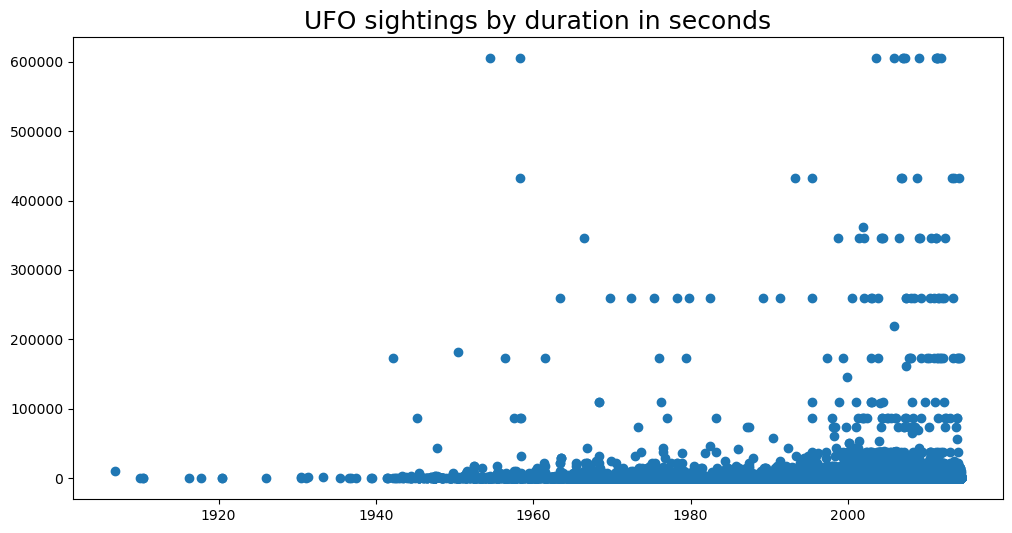

In [49]:

plt.figure(figsize = (12, 6))
plt.scatter(filtered_by_duration.index, filtered_by_duration['duration (seconds)'])
plt.title('UFO sightings by duration in seconds', fontsize=18)
plt.show()

In [50]:
country_counts = df['country'].value_counts()
# Filter countries with more than 100 occurrences
valid_countries = country_counts[country_counts > 100].index
# Keep only rows where 'country' is in valid_countries
df_filtered_by_amount = df[df['country'].isin(valid_countries)]

In [51]:
year_country = df_filtered_by_amount.groupby('country').resample('Y').count()
year_country

city  state  country  shape  duration (seconds)  \
country       datetime                                                      
Australia     1958-12-31     1      0        1      0                   1   
              1959-12-31     0      0        0      0                   0   
              1960-12-31     1      0        1      1                   0   
              1961-12-31     0      0        0      0                   0   
              1962-12-31     1      0        1      1                   1   
...                        ...    ...      ...    ...                 ...   
not specified 2010-12-31   376    313      376    361                 265   
              2011-12-31   468    399      468    451                 315   
              2012-12-31   570    477      570    561                 400   
              2013-12-31   555    485      555    537                 385   
              2014-12-31   185    151      185    179                 185   

                          duration (hours/min)  comments  date posted  \
country       datetime                                                  
Australia     1958-12-31                     1         1            1   
              1959-12-31                     0         0            0   
              1960-12-31                     1         1            1   
              1961-12-31                     0         0            0   
              1962-12-31                     1         1            1   
...                                        ...       ...          ...   
not specified 2010-12-31                   357       376          376   
              2011-12-31                   450       468          468   
              2012-12-31                   548       570          570   
              2013-12-31                   537       555          555   
              2014-12-31                   180       185          185   

                          latitude  longitude  country_extracted  
country       datetime                                            
Australia     1958-12-31         1          1                  1  
              1959-12-31         0          0                  0  
              1960-12-31         1          1                  1  
              1961-12-31         0          0                  0  
              1962-12-31         1          1                  1  
...                            ...        ...                ...  
not specified 2010-12-31       376        376                 57  
              2011-12-31       468        468                 56  
              2012-12-31       570        570                 83  
              2013-12-31       555        555                 69  
              2014-12-31       185        185                 25  

[921 rows x 11 columns]

In [52]:
#UNSTACKING
df_filtered_by_amount.groupby('country').resample('Y').size().unstack(level=0)

country,Australia,Between,Canada,Germany,India,Mexico,Netherlands,New Zealand,Puerto Rico,South Africa,Uk/England,United Kingdom,United States of America,not specified
datetime,,,,,,,,,,,,,,
1910-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
1911-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1912-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1913-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1914-12-31,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-31,17.0,11.0,188.0,5.0,4.0,10.0,8.0,9.0,3.0,9.0,8.0,119.0,3825.0,376.0
2011-12-31,15.0,10.0,163.0,4.0,7.0,11.0,3.0,2.0,8.0,8.0,2.0,56.0,4666.0,468.0
2012-12-31,26.0,4.0,296.0,6.0,22.0,7.0,5.0,3.0,9.0,24.0,13.0,87.0,6750.0,570.0


In [53]:
sightings_by_country = df_filtered_by_amount.groupby('country').resample('Y').size().unstack(level=0)

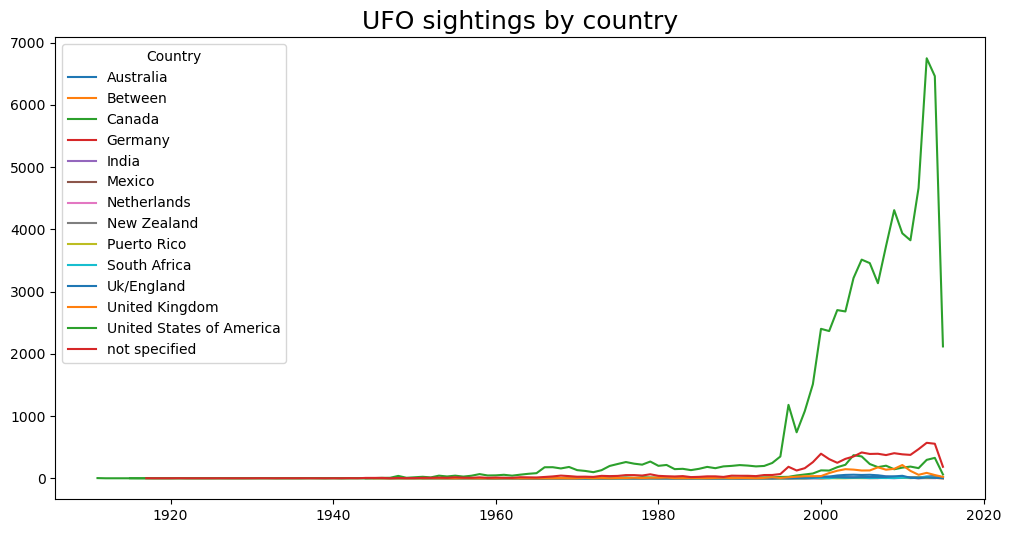

In [54]:
plt.figure(figsize=(12, 6))

# Plot each country separately to assign labels
for country in sightings_by_country.columns:
    plt.plot(sightings_by_country.index, sightings_by_country[country], label=country)

plt.title("UFO sightings by country", fontsize=18)
plt.legend(title="Country", fontsize=10, loc="upper left")  # Add legend
plt.show()

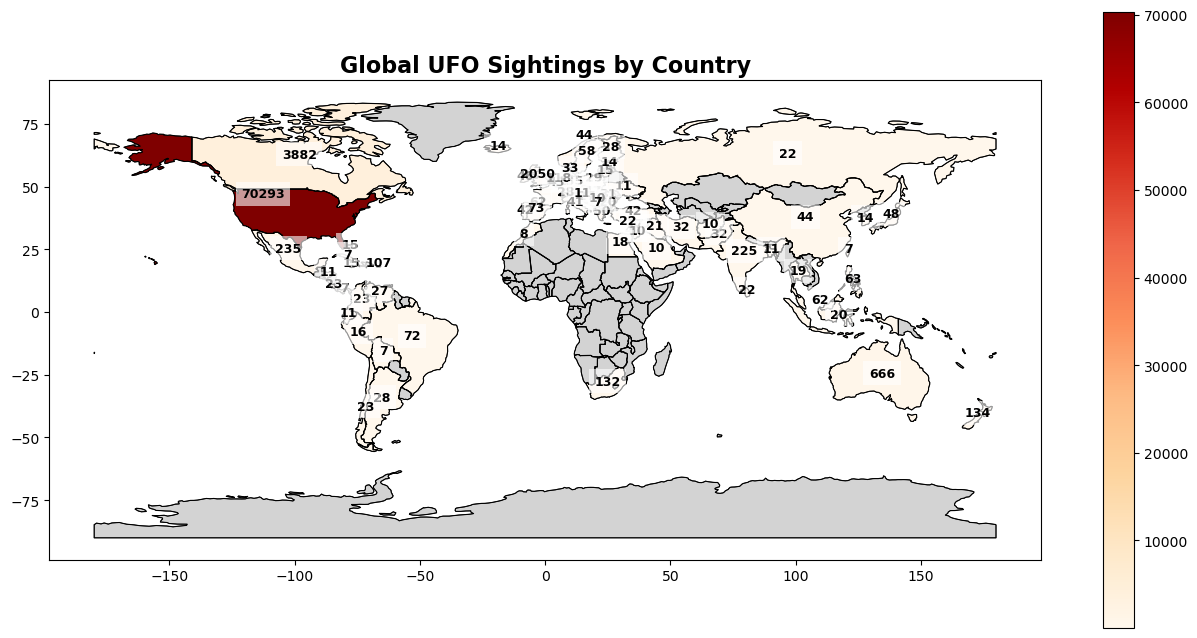

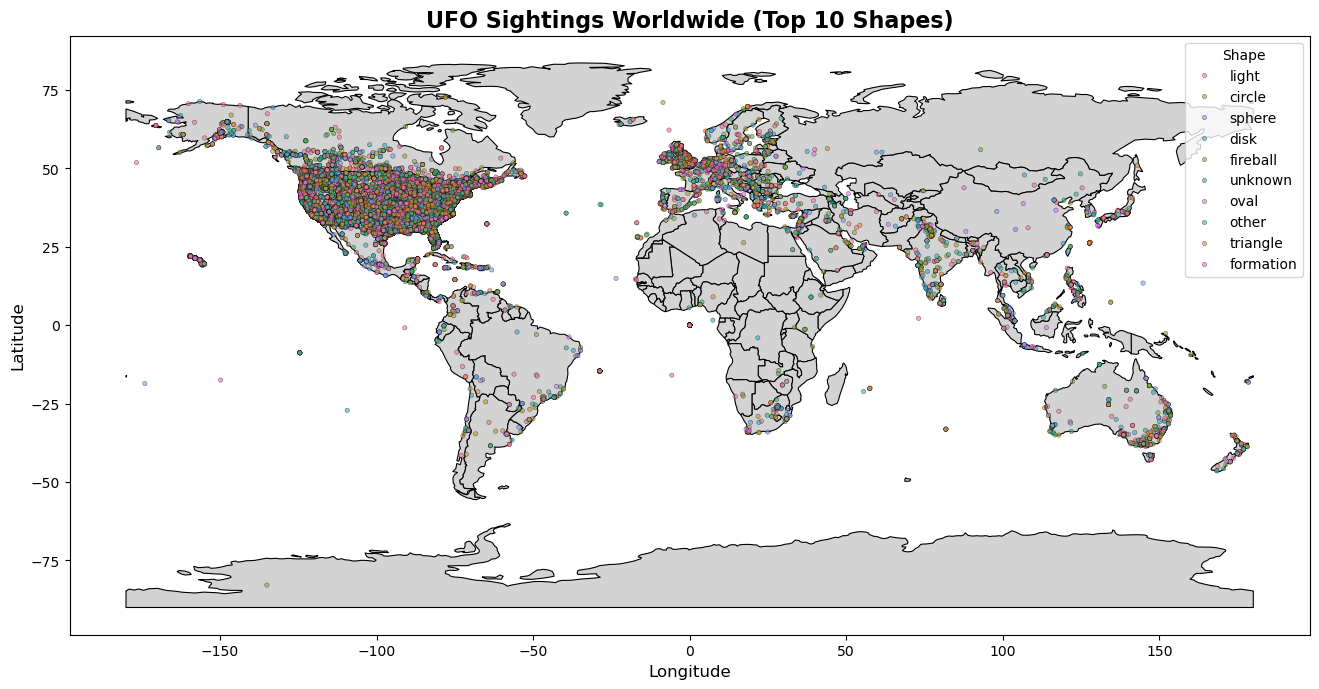

In [61]:
# Drop duplicates and missing values
df = df.drop_duplicates()
df = df.dropna(subset=["latitude", "longitude", "shape"])
df = df.reset_index(drop=True)

# Get the top 10 most common shapes
top_shapes = df["shape"].value_counts().nlargest(10).index

# Filter dataset to include only the top 10 shapes
df_top_shapes = df[df["shape"].isin(top_shapes)]

# Create figure
fig, ax = plt.subplots(figsize=(16, 8))

# Plot landmass in gray
world.plot(ax=ax, color="lightgray", edgecolor="black", linewidth=0.8)

# Assign colors to the top 10 shapes
palette = sns.color_palette("husl", len(top_shapes))
shape_colors = dict(zip(top_shapes, palette))

# Plot scatter points
sns.scatterplot(
    data=df_top_shapes,
    x="longitude",
    y="latitude",
    hue="shape",
    palette=shape_colors,
    alpha=0.6,
    edgecolor="black",
    linewidth=0.3,
    s=10,  # Small point size
    ax=ax
)

plt.title("UFO Sightings Worldwide (Top 10 Shapes)", fontsize=16, fontweight="bold")
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Shape", fontsize=10, loc="upper right")

plt.show()